# Bernoulli and Binomial Distribution - Lab

## Introduction
In this lab, you'll practice your newly gained knowledge on the Bernoulli and Binomial Distribution.

## Objectives
You will be able to:

* Apply the formulas for the Binomial and Bernoulli distribution to calculate the probability of a specific event
* Use `numpy` to randomly generate Binomial and Bernoulli trials
* Use `matplotlib` to show the output of generated Binomial and Bernoulli trials

## Apply the formulas for the Binomial and Bernoulli distributions

When playing a game of bowling, what is the probability of throwing exactly 3 strikes in a game with 10 rounds? Assume that the probability of throwing a strike is 25% for each round. Use the formula for the Binomial distribution to get to the answer. You've created this before, so we provide you with the function for factorials again:

In [1]:
def factorial(n):
    prod = 1
    while n >= 1:
        prod = prod * n
        n = n - 1
    return prod

In [3]:
def binomial_probability(k, n, p):
    binom_coeff = factorial(n) / (factorial(k) * factorial(n - k))
    probability = binom_coeff * (p ** k) * ((1 - p) ** (n - k))
    return probability

k = 3
n = 10
p = 0.25

p_3_strikes = binomial_probability(k, n, p)
print(f"The probability of throwing exactly 3 strikes in a game with 10 rounds is: {p_3_strikes}")

The probability of throwing exactly 3 strikes in a game with 10 rounds is: 0.25028228759765625


Now, create a function for the Binomial distribution with three arguments $n$, $p$ and $k$ just like in the formula:

$$ \large P(Y=k)= \binom{n}{k} p^k(1-p)^{(n-k)}$$ 


In [4]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

def binom_distr(n, p, k):
    # Calculate the binomial coefficient
    binom_coeff = factorial(n) / (factorial(k) * factorial(n - k))
    # Calculate the probability
    probability = binom_coeff * (p ** k) * ((1 - p) ** (n - k))
    return probability

Validate your previous result by applying your new function.

In [5]:
# Your code here
# Parameters
n = 10
p = 0.25
k = 3

# Calculate the probability using the binom_distr function
probability = binom_distr(n, p, k)
print(f"The probability of throwing exactly 3 strikes in a game with 10 rounds is: {probability}")

The probability of throwing exactly 3 strikes in a game with 10 rounds is: 0.25028228759765625


Now write a `for` loop along with your function to compute the probability that you have five strikes or more in one game. You'll want to use `numpy` here!

In [6]:
import numpy as np
# Your code here

# Initialize a variable to accumulate the probabilities
total_probability = 0

# Loop through the number of strikes from 5 to 10
for k in range(5, 11):
    total_probability += binom_distr(n, p, k)

print(f"The probability of having five or more strikes in one game is: {total_probability}")


The probability of having five or more strikes in one game is: 0.07812690734863281


## Use a simulation to get the probabilities for all the potential outcomes

Repeat the experiment 5000 times.

In [9]:
# leave the random seed here for reproducibility of results
np.random.seed(123)

# Parameters for the binomial distribution
n = 10  # Number of trials
p = 0.25  # Probability of success in each trial
size = 5000  # Number of experiments

# Simulate the binomial distribution
simulated_data = np.random.binomial(n, p, size)

# Get the unique outcomes and their counts
unique_outcomes, counts = np.unique(simulated_data, return_counts=True)

print(unique_outcomes)
print(counts)

[0 1 2 3 4 5 6 7 8]
[ 310  941 1368 1286  707  297   78   11    2]


In [ ]:
# the results should look like this:
# [0 1 2 3 4 5 6 7 8]
# [ 310  941 1368 1286  707  297   78   11    2]

## Visualize these results

Create the PMF using these empirical results (that is, the proportions based on the values we obtained running the experiment 5000 times).

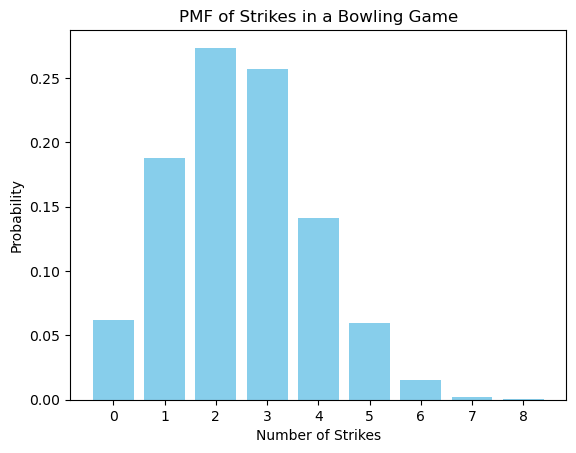

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# Calculate the probabilities (PMF) by dividing counts by the total number of experiments
probabilities = counts / size

# Plotting the PMF
plt.bar(unique_outcomes, probabilities, color='skyblue')
plt.xlabel('Number of Strikes')
plt.ylabel('Probability')
plt.title('PMF of Strikes in a Bowling Game')
plt.xticks(unique_outcomes)  # Ensure all outcomes are shown
plt.show()


You should see that, with a 25% strike hit rate, even when simulating 5000 times, an almost perfect and/or perfect game of 9 and 10 strikes didn't even occur once! If you change the random seed, however, you'll see that perfect games will show up occasionally. 

Next, let's create the CDF based on these results. You can use `np.cumsum` to obtain cumulative probabilities.

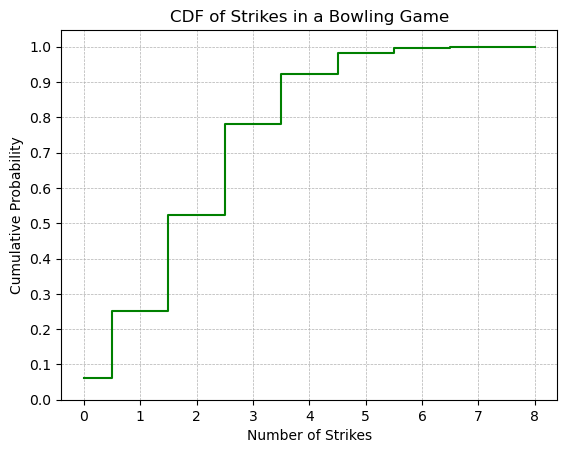

In [11]:
# Your code here
# Calculate the CDF using cumulative sum
cdf = np.cumsum(probabilities)

# Plotting the CDF
plt.step(unique_outcomes, cdf, where='mid', color='green')
plt.xlabel('Number of Strikes')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Strikes in a Bowling Game')
plt.xticks(unique_outcomes)  # Ensure all outcomes are shown
plt.yticks(np.linspace(0, 1, 11))  # Optional: Makes it easier to see the distribution
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Optional: Adds a grid for easier reading
plt.show()

## Summary

Congratulations! In this lab, you practiced your newly gained knowledge of the Bernoulli and Binomial Distribution.